
<center><h1> Time Series Data</h1></center>

In [1]:
#Load pandas 
import pandas as pd
#Set urls
url_train = 'https://raw.githubusercontent.com/llSourcell/Time_Series_Prediction/master/Train_SU63ISt.csv'
url_test= 'https://raw.githubusercontent.com/llSourcell/Time_Series_Prediction/master/Test_0qrQsBZ.csv'
#Pandas can now load urls directly. No more wget. 
train = pd.read_csv(url_train)
test = pd.read_csv(url_test)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [3]:
train.head(5)
 


,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
train.shape

(18288, 3)

In [5]:
test.head(5)

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [6]:
test.shape

(5112, 2)

***Set Column to Datetime***

To have a time series data, we need to tell pandas that we have a specific column with the date and time.  While we have named it datetime, we have to take the further step of updateing it. 

In [7]:
#Let's look at the data. Note a slightly different way to find data type.
print(train['Datetime'][0], "Data Type:", train.Datetime.dtypes)

25-08-2012 00:00 Data Type: object


In [8]:
#Update to Datetime
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')


In [9]:
#Let's look at the data
print(train['Datetime'][0], "Data Type:", train.Datetime.dtypes)

2012-08-25 00:00:00 Data Type: datetime64[ns]


### Dates are full of Features
- We can extract numerous features out of our data. 
- Examples. Year, Month, Day, Hour, Day of Week, Weekend, etc.

In [10]:
#Performing operations on multiple data frames.
for i in (train, test):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day']= i.Datetime.dt.day
    i['hour']=i.Datetime.dt.hour

In [11]:
#Now let's get the day of the week using datetime. 
train['day_of_week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']


In [12]:
#Is it a weekend?
def is_weekend(day):
    if day.dayofweek == 5 or day.dayofweek == 6:
        return 1
    else:
        return 0
      
train['weekend'] = train['Datetime'].apply(is_weekend)
train.head(5)


,ID,Datetime,Count,year,month,day,hour,day_of_week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


### Plot Value (Count) vs Time
This will plot the entire range.


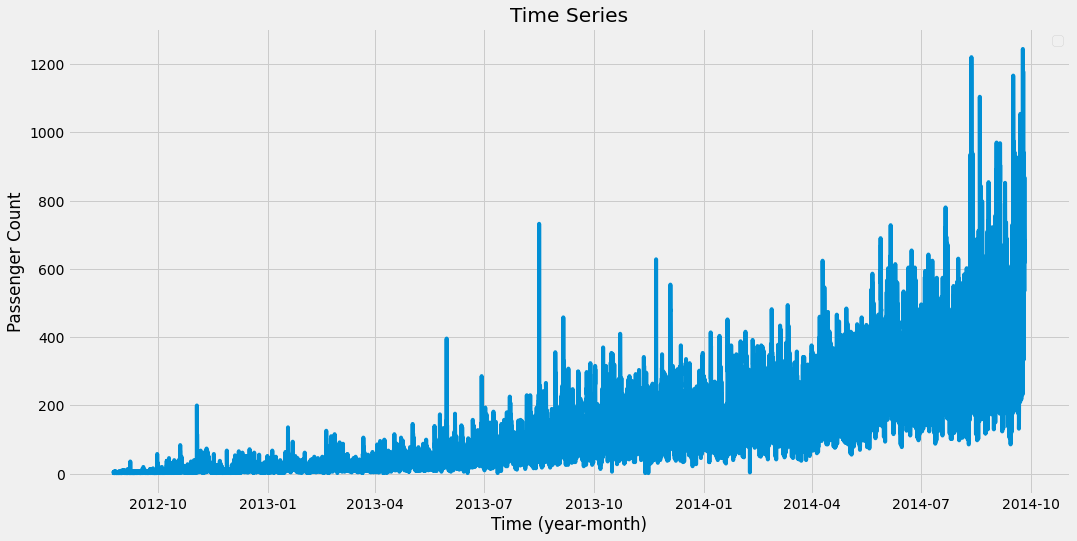

In [13]:
train.index = train['Datetime']
df = train.drop('ID',1)
ts = df['Count']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("Passenger Count")
plt.legend(loc = 'best')

*** Exploratory Analysis***
- This indicates the value for the mean level of the count for each year. 

<AxesSubplot:xlabel='year'>

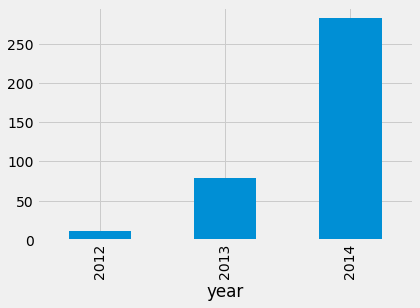

In [14]:
train.groupby('year')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

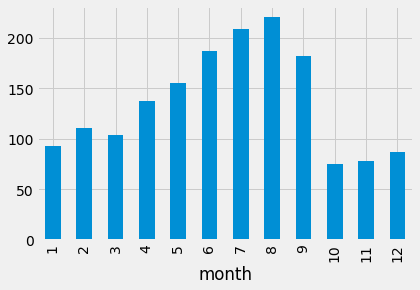

In [15]:
train.groupby('month')['Count'].mean().plot.bar()

<AxesSubplot:title={'center':'Passenger Count(Monthwise)'}, xlabel='year,month'>

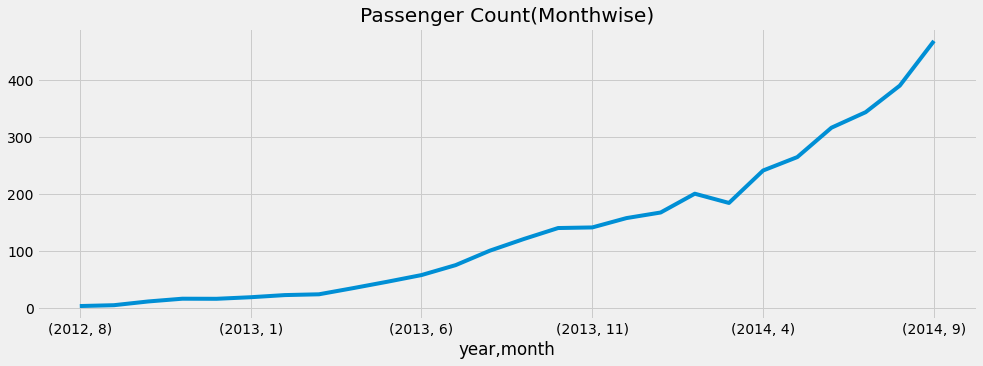

In [16]:
temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize =(15,5), title = "Passenger Count(Monthwise)", fontsize = 14)

<AxesSubplot:xlabel='day'>

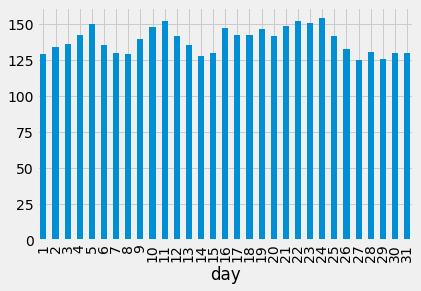

In [17]:
train.groupby('day') ['Count'].mean().plot.bar()

<AxesSubplot:xlabel='hour'>

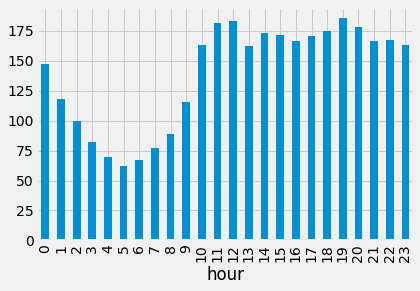

In [18]:
train.groupby('hour')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='weekend'>

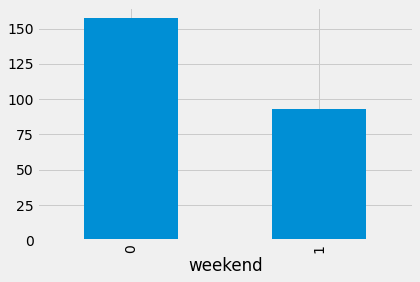

In [19]:
train.groupby('weekend') ['Count'].mean().plot.bar()

<AxesSubplot:xlabel='day_of_week'>

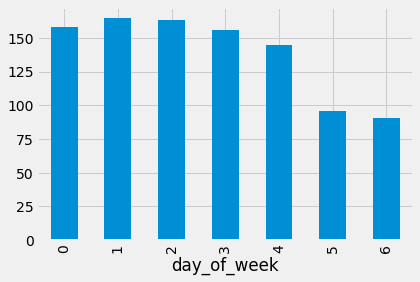

In [20]:
train.groupby('day_of_week') ['Count'].mean().plot.bar()

# Resample data
Convenience method for frequency conversion and resampling of time series  Often you don't want to have the same 

In [21]:
train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%y %H:%M')
#Here we need to set the index to a timestamp
train.index = train.Timestamp

#Hourly
hourly = train.resample('H').mean()

#Daily
daily = train.resample('D').mean()

#Weekly
weekly = train.resample('W').mean()

#Monthly
monthly = train.resample('M').mean()

In [22]:
hourly.head(5)

,ID,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,0.0,8.0,2012.0,8.0,25.0,0.0,5.0,1.0
2012-08-25 01:00:00,1.0,2.0,2012.0,8.0,25.0,1.0,5.0,1.0
2012-08-25 02:00:00,2.0,6.0,2012.0,8.0,25.0,2.0,5.0,1.0
2012-08-25 03:00:00,3.0,2.0,2012.0,8.0,25.0,3.0,5.0,1.0
2012-08-25 04:00:00,4.0,2.0,2012.0,8.0,25.0,4.0,5.0,1.0


In [23]:
monthly.head(5)

,ID,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,,
2012-08-31,83.5,2.952381,2012.0,8.0,28.0,11.5,3.000000,0.285714
2012-09-30,527.5,4.444444,2012.0,9.0,15.5,11.5,3.166667,0.333333
2012-10-31,1259.5,10.986559,2012.0,10.0,16.0,11.5,2.806452,0.258065
2012-11-30,1991.5,15.827778,2012.0,11.0,15.5,11.5,3.033333,0.266667
2012-12-31,2723.5,15.680108,2012.0,12.0,16.0,11.5,3.064516,0.322581


<AxesSubplot:title={'center':'Monthly'}, xlabel='Datetime'>

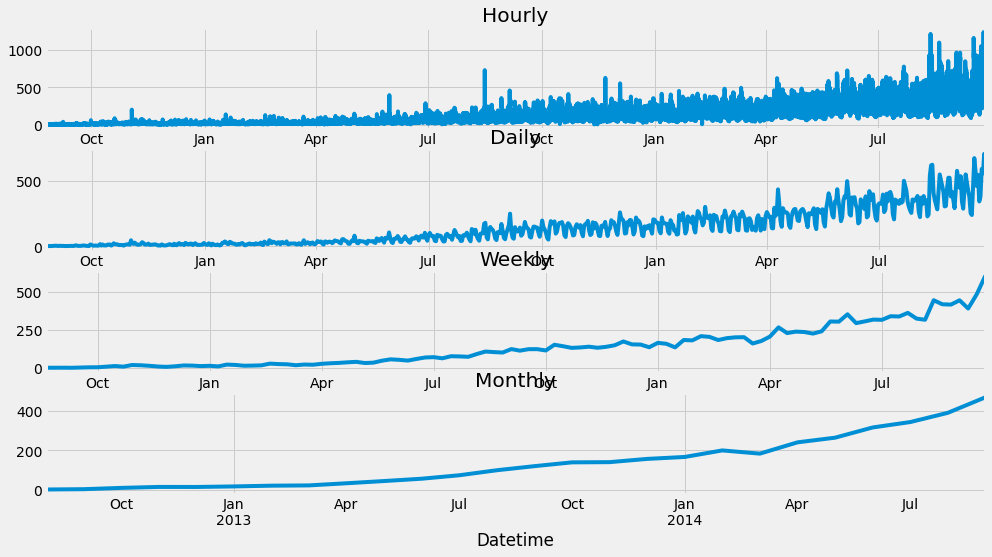

In [24]:
#Plots...notice the variablity.
fig,axs = plt.subplots(4,1)

hourly.Count.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Count.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Count.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Count.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])

In [25]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

#Converting to Daily mean 
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

#Converting to Daily mean
train = train.resample('D').mean()

***Divide data into training and validation***
-A key aspect of what you use for training data is what time periods are selected.  
- You can't just select a random sample, but need to split by a specific time. 

In [27]:
Train = train.ix['2012-08-25':'2014-06-24']
valid = train.ix['2014-06-25':'2014-09-25']
Train.shape,valid.shape

AttributeError: ignored

In [ ]:
Train.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize = 14, label = 'Train')
valid.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize =14, label = 'Valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.legend(loc = 'best')

** Naive Approach**
- For the Naive model, we will just include the most recent value as our preduction for the rest of the training set. 


In [ ]:
dd = np.asarray(Train.Count)
y_hat =valid.copy()
y_hat['naive']= dd[len(dd)- 1] #this just selects the last value. 
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['Count'],label = 'Train')
plt.plot(valid.index, valid['Count'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive Forecast')

*** Calculate RMS Error for Naive Approach***

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.Count, y_hat.naive))
rmse

Moving Average Approach and Calculate RMS Error for Moving Average Approach
- It is also possible to forcast based on a "rolling" window
- This will create a smoothing effect 

In [ ]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'best')
plt.show()
rmse = sqrt(mean_squared_error(valid['Count'], y_hat_avg['moving_average_forecast']))
rmse


In [ ]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 20 Observations')
plt.legend(loc = 'best')
plt.show()
rmse = sqrt(mean_squared_error(valid['Count'], y_hat_avg['moving_average_forecast']))
rmse


In [ ]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast']= Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()
rmse = sqrt(mean_squared_error(valid['Count'], y_hat_avg['moving_average_forecast']))
rmse